In [1]:
import pandas as pd
import numpy as np

#### 분석 주제
한 회사의 HR 부서에서는 일부 고객이 향후 2년 내에 회사를 떠날지 여부를 예측하려고 합니다. 귀하의 임무는 미래와 현재 직원의 전망을 예측하는 예측 모델을 구축하는 것입니다. - 출처 : Kaggle 데이터세트 정보 

#### 컬럼별 설명
- Education : 직원들의 교육 수준
- Joining Year : 직원들의 입사 연도
- City : 회사 거점 지역
- PaymentTier : 연봉 등급 (결제 등급: 1: 최고 2: 중간 수준 3: 최저)
- Age : 직원들의 나이
- Gender : 직원 성별
- EverBenched : 1개월 이상 프로젝트를 중단한 적이 없음 No : 프로젝트 도중 중단 경험 있음 Yes : 프로젝트 도중 중단 경험 없음
- ExperienceInCurrentDomain : 현재 분야의 경험
- LeaveOrNot (Target) : 직원이 향후 2년 내에 회사를 떠날지 여부 1: 떠남 , 0: 안떠남

In [2]:
e_df = pd.read_csv('./datasets/Employee.csv')
e_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
e_df['Education'].value_counts()
# Bachelors = 학사 과정 
# Masters = 석사 과정
# PHD = 박사 과정

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

In [4]:
e_df.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


#### 데이터 전처리
- 결측치 , 중복된행 검사 (있으면 제거)
- LabelEncoding
- histogram 시각화 후 비중 맞추기 (한 쪽으로 치우친 feature는 제거)
- 표준화 작업
- 이상치 제거

In [5]:
e_df.duplicated().sum() # 중복치 1889개

1889

In [6]:
e_df = e_df.drop_duplicates()
e_df.duplicated().sum() # 중복 제거 

0

In [7]:
pre_df = e_df.copy()

In [8]:
from sklearn.preprocessing import LabelEncoder

# 범주형 데이터 
columns = ['Education', 'City', 'Gender', 'EverBenched']

encoders = {}

# LabelEncoder()로 문자형 -> 정수형으로 변경 작업 
for column in columns :
    encoder = LabelEncoder()
    pre_df[column] = encoder.fit_transform(pre_df[column].tolist())
    encoders[column] = encoder
    print(f'{column} : {encoder.classes_}')
   
pre_df    


Education : ['Bachelors' 'Masters' 'PHD']
City : ['Bangalore' 'New Delhi' 'Pune']
Gender : ['Female' 'Male']
EverBenched : ['No' 'Yes']


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4645,1,2017,2,2,31,0,0,2,0
4647,0,2016,2,3,30,1,0,2,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1


- Gender : (1:Male, 0 : Female)
- EverBenched : (1: Yes, 2: No) 💡Yes인 경우 프로젝트를 중단한 적이 없는 직원, No는 중단한 적이 있는 직원
- Education : (0: 학사 ,1 : 석사, 2: 박사)


In [9]:
pre_df['City'].value_counts()

City
0    1171
2     801
1     792
Name: count, dtype: int64

array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'City'}>],
       [<Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'EverBenched'}>,
        <Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>]], dtype=object)

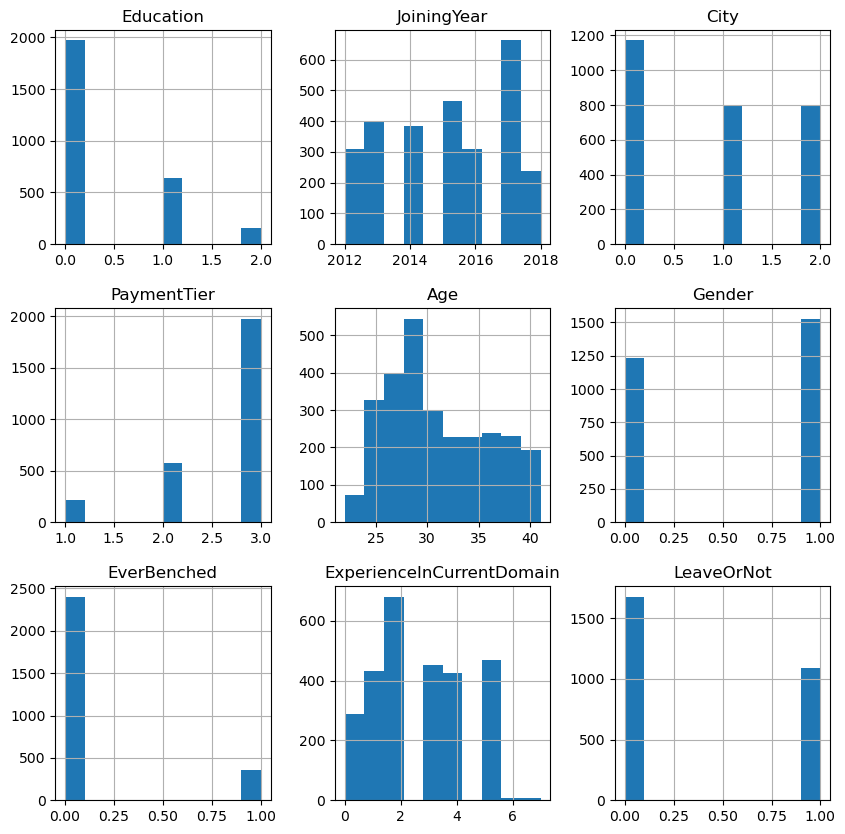

In [10]:
pre_df.hist(figsize=(10,10))

In [11]:
e_df['EverBenched'].value_counts()

EverBenched
No     2403
Yes     361
Name: count, dtype: int64

In [12]:
# 타겟에 대한 피처들의 비중 분석
corr = pre_df.corr()
corr[['LeaveOrNot']].sort_values(by='LeaveOrNot', ascending=False)[1:]
# Gender , Joining Year 순으로 높다. 

,LeaveOrNot
JoiningYear,0.150650
City,0.127548
EverBenched,0.037137
Education,0.019661
ExperienceInCurrentDomain,-0.021181
Age,-0.114943
PaymentTier,-0.119891
Gender,-0.190457


**각 피처별로 타겟 데이터에 대한 비중이 그렇게 크지 않은것을 확인할 수 있었다.**

Text(0.5, 1.0, 'Leave Distribution')

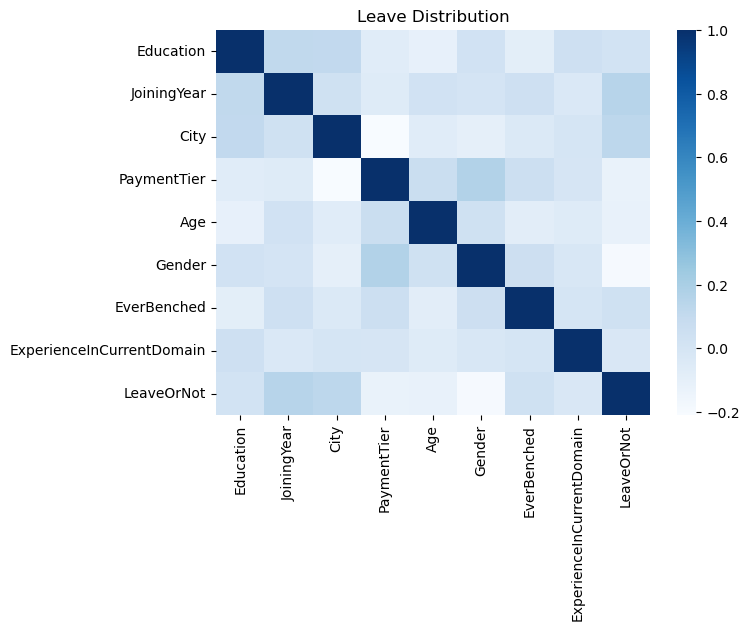

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = pre_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Blues")
heatmap.set_title("Leave Distribution")

In [14]:
# 히스토그램에서 비중이 한 쪽으로 치우친 Feature들은 삭제하자.
# ex) Education , EverBenched 삭제 
pre_df = pre_df.drop(labels=['Education', 'EverBenched'], axis=1)
pre_df

,JoiningYear,City,PaymentTier,Age,Gender,ExperienceInCurrentDomain,LeaveOrNot
0,2017,0,3,34,1,0,0
1,2013,2,1,28,0,3,1
2,2014,1,3,38,0,2,0
3,2016,0,3,27,1,5,1
4,2017,2,3,24,1,2,1
...,...,...,...,...,...,...,...
4645,2017,2,2,31,0,2,0
4647,2016,2,3,30,1,2,0
4649,2013,2,2,37,1,2,1
4650,2018,1,3,27,1,5,1


array([[<Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'PaymentTier'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'ExperienceInCurrentDomain'}>],
       [<Axes: title={'center': 'LeaveOrNot'}>, <Axes: >, <Axes: >]],
      dtype=object)

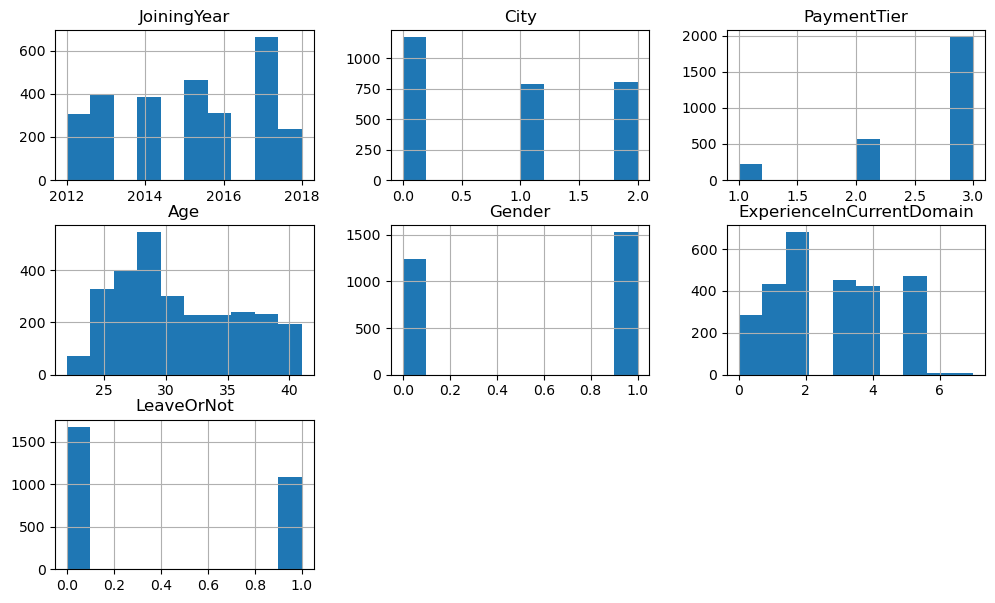

In [15]:
pre_df.hist(figsize=(12,7))

In [16]:
a_df = e_df.copy()

In [17]:
import seaborn as sns
import numpy as np


a_df['PaymentTier'] = a_df['PaymentTier'].astype(str)
a_df['LeaveOrNot'] = a_df['LeaveOrNot'].astype(str)


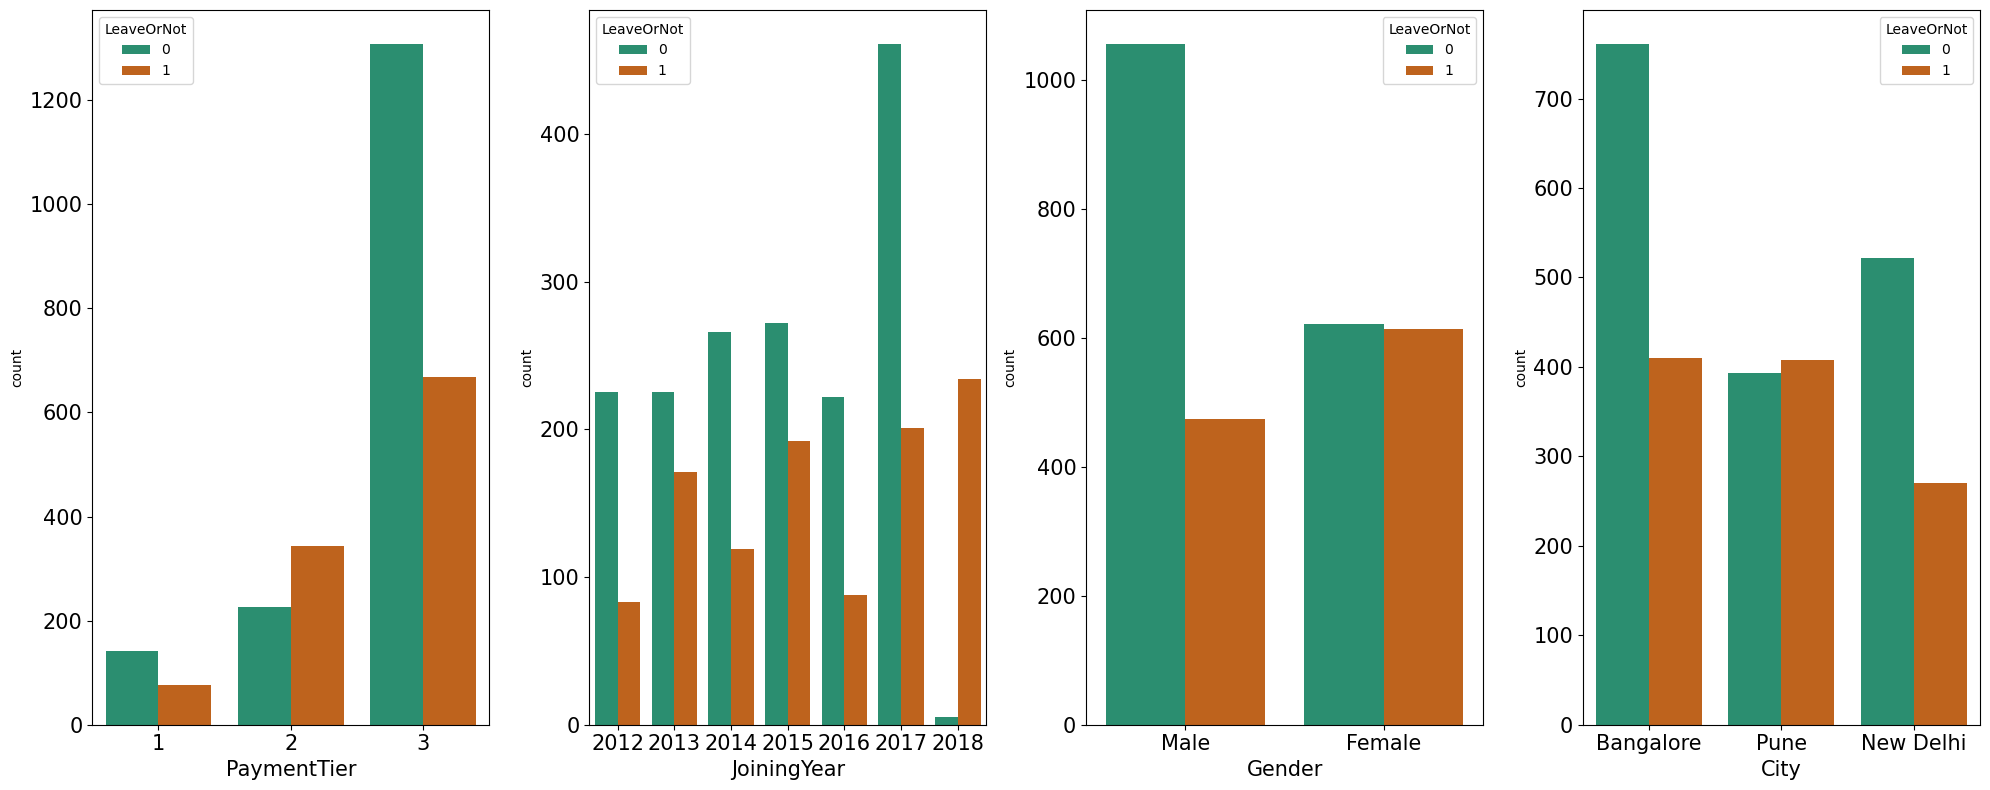

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))

order_pay = ['1','2','3']

sns.countplot(x='PaymentTier', hue='LeaveOrNot', palette="Dark2", data=a_df, ax=axes[0], order=order_pay)
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)

sns.countplot(x='JoiningYear', hue='LeaveOrNot', palette="Dark2", data=a_df, ax=axes[1])
axes[1].tick_params(axis='both', which='major', labelsize=15)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)

sns.countplot(x='Gender', hue='LeaveOrNot', palette="Dark2", data=a_df, ax=axes[2])
axes[2].tick_params(axis='both', which='major', labelsize=15)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=15)

sns.countplot(x='City', hue='LeaveOrNot', palette="Dark2", data=a_df, ax=axes[3])
axes[3].tick_params(axis='both', which='major', labelsize=15)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=15)

axes[0].set_xlabel('PaymentTier', fontsize=15)
axes[1].set_xlabel('JoiningYear', fontsize=15)
axes[2].set_xlabel('Gender', fontsize=15)
axes[3].set_xlabel('City', fontsize=15)

plt.tight_layout()
plt.show()



### 💡시각화 분석
#### 📌 Feature 소개
- PaymentTier(연봉등급) **1: 고소득, 2: 중위소득, 3: 하위소득**
- Joining Year (입사연도) **2012 ~ 2018**
- Gender (성별)
- City (회사 지점)
- LeaveOrNot(퇴사 여부) **1: 퇴사(Positive) , 2:퇴사 안함(Negative)**

#### 📊 시각화 분석 내용
> 연봉등급별로 퇴사 여부를 분석결과 가장 저소득 연봉을 받는 직원들의 퇴사율이 가장 높았으며, 입사연도 같은 경우 2017년도에 입사한 직원들이 가장 많았지만, 퇴사율이 가장 높은 입사연도 직원들은 2018년도 인 것으로보아 비교적 신규 직원들의 퇴사율이 매우 높은 것을 알 수 있었습니다.
> 
> 성별 분포별로 퇴사율 분석결과 여성직원의 경우 전체 분포 대비 퇴사율이 높은 것을 알 수 있었습니다.
> 
> Pune이라는 지역이 (인도 내 회사로 추정) 전체 직원 수 대비 퇴사율이 매우 높은 것을 알 수 있었습니다.

😊 해당 데이터세트에서는 모든 Feature에 연속형 데이터가 없기 때문에 이상치 제거를 할 필요가 없습니다.

#### 테스트, 학습 세트 분리 & SMOTE(OverSampling) 실시

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)
y_train.value_counts()
# SMOTE를 사용하여 오버샘플링을 하자! 퇴사를 결정하는 1의 타겟 데이터가 낮은 데이터 비중을 차지하기에 
# 이 비중을 높혀야 합니다.

LeaveOrNot
0    1341
1     870
Name: count, dtype: int64

In [20]:
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
y_train_over.value_counts()
# 정상적으로 오버샘플링 되었습니다.

LeaveOrNot
1    1341
0    1341
Name: count, dtype: int64

#### 📌 Classifier (분류 작업) 실시 1
- 교차검증 (GridSearchCV)
- SVC (Support Vactor Machine {kernel : linear})
- KNN (최근접 이웃 알고리즘)
----
- Ensemble (Bagging, Boosting)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# DTC 파라미터 선언
dtc_parameters = {'max_depth' : [5,6,7], 'min_samples_split' :[12,13,14] }
dtc = DecisionTreeClassifier()
# 교차 검증 수행
g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)



In [22]:
# # SVC 파라미터 선언 (커널을 linear로 설정 )
# svc_parameters = {'svc__C' : [1, 10, 100],
#                   'svc__kernel' : ['linear']
#                  }
    
# # SVC 클래스 설정 
# svc = SVC(probability=True)

# # SVC 파이프라인 구축 , 교차 검증 수행
# svc_l_pipe = Pipeline([('standard_scaler', StandardScaler()),('svc', svc)])
# g_svc = GridSearchCV(svc_l_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
# g_svc.fit(X_train_over, y_train_over)



# SVC 파라미터 선언 (커널을 linear로 설정)
svc_parameters = {'svc__C': [0.01, 0.1, 1, 10, 100],
                  'svc__kernel': ['linear']
                 }

# SVC 클래스 설정 (커널을 linear로 설정)
svc = SVC(kernel='linear', probability=True)

# SVC 파이프라인 구축, 교차 검증 수행
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_svc.fit(X_train_over, y_train_over)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc',
                                        SVC(kernel='linear',
                                            probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear']},
             return_train_score=True)

In [23]:
# KNN 파라미터 선언 
knn_parameters = {'knn__n_neighbors' : [3,5,7,9,11,15,17]}

# KNN 클래스 설정
knn = KNeighborsClassifier()

# KNN 파이프라인 구축, 교차 검증 수행 
knn_pipe = Pipeline([('standard_scaler', StandardScaler()),('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [24]:
g_dtc.fit(X_train_over, y_train_over)
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)
g_dtc

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 12}",0.730434,1
1,"{'max_depth': 5, 'min_samples_split': 13}",0.730434,1
2,"{'max_depth': 5, 'min_samples_split': 14}",0.730434,1
3,"{'max_depth': 6, 'min_samples_split': 12}",0.712897,7
4,"{'max_depth': 6, 'min_samples_split': 13}",0.712897,7
5,"{'max_depth': 6, 'min_samples_split': 14}",0.712897,7
6,"{'max_depth': 7, 'min_samples_split': 12}",0.719980,4
7,"{'max_depth': 7, 'min_samples_split': 13}",0.718860,6
8,"{'max_depth': 7, 'min_samples_split': 14}",0.719233,5


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [12, 13, 14]},
             return_train_score=True)

In [25]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 17]},
             return_train_score=True)

In [26]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier

# AdaBoost 분류 기법 사용 

paramters = {
    'n_estimators' : [50, 100, 150],
    'learning_rate' : [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=paramters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)



GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [27]:
# bagging (Random Forest 분류 기법 사용)

rfc_parameters = {
    'max_depth' : [5,6,7],
    'min_samples_split' : [15,16,17]
}

rfc = RandomForestClassifier(n_estimators=100)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=5, n_jobs=-1)
g_rfc.fit(X_train_over, y_train_over)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [15, 16, 17]})

In [28]:
# Gradient Boost 분류 기법 사용 
gbc_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=gbc_parameters, cv=3)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

x_parameters = {'n_estimators' : [50, 100, 500],
               'learning_rate' : [0.3, 0.5, 0.7, 1]}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, param_grid=x_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)


[0]	validation_0-logloss:0.61087	validation_1-logloss:0.61002
[1]	validation_0-logloss:0.56529	validation_1-logloss:0.56749
[2]	validation_0-logloss:0.53004	validation_1-logloss:0.53570
[3]	validation_0-logloss:0.51032	validation_1-logloss:0.51554
[4]	validation_0-logloss:0.49570	validation_1-logloss:0.50099
[5]	validation_0-logloss:0.48303	validation_1-logloss:0.48864
[6]	validation_0-logloss:0.47382	validation_1-logloss:0.48139
[7]	validation_0-logloss:0.46679	validation_1-logloss:0.47192
[8]	validation_0-logloss:0.46247	validation_1-logloss:0.46585
[9]	validation_0-logloss:0.45852	validation_1-logloss:0.46123
[10]	validation_0-logloss:0.45322	validation_1-logloss:0.46011
[11]	validation_0-logloss:0.44979	validation_1-logloss:0.45611
[12]	validation_0-logloss:0.44624	validation_1-logloss:0.45208
[13]	validation_0-logloss:0.44292	validation_1-logloss:0.44960
[14]	validation_0-logloss:0.43963	validation_1-logloss:0.44825
[15]	validation_0-logloss:0.43636	validation_1-logloss:0.44761
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [30]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

lg_parameters = {'n_estimators' : [50, 100, 500],
                'learning_rate' : [0.3, 0.5, 0.7, 1]}
X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train),(X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lg_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Number of positive: 1341, number of negative: 1341
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 2682, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [31]:
y_train_over.value_counts()

LeaveOrNot
1    1341
0    1341
Name: count, dtype: int64

#### 📌 GraphViz로 결정트리 확인 

In [32]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(g_dtc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([0, 4, 2, 1, 3, 5], dtype=int64)

In [33]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

JoiningYear: 0.0976
Gender: 0.0684
PaymentTier: 0.0538
City: 0.0394
Age: 0.0086
ExperienceInCurrentDomain: 0.0058


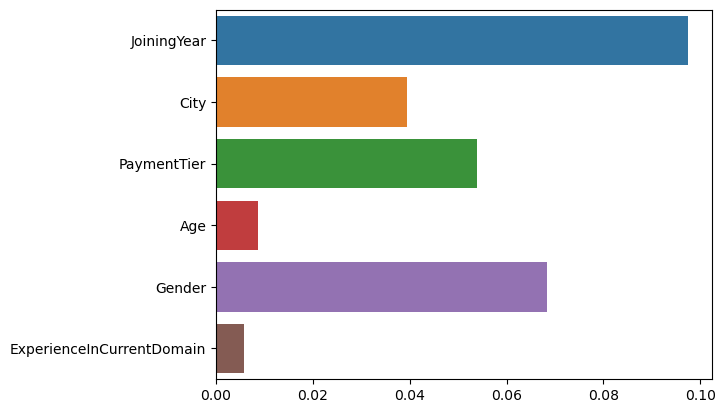

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=importance.importances_mean, y=features.columns)
plt.show()

In [35]:
imp_df = pre_df[['JoiningYear', 'Gender', 'LeaveOrNot']]
imp_df.reset_index()

,index,JoiningYear,Gender,LeaveOrNot
0,0,2017,1,0
1,1,2013,0,1
2,2,2014,0,0
3,3,2016,1,1
4,4,2017,1,1
...,...,...,...,...
2759,4645,2017,0,0
2760,4647,2016,1,0
2761,4649,2013,1,1
2762,4650,2018,1,1


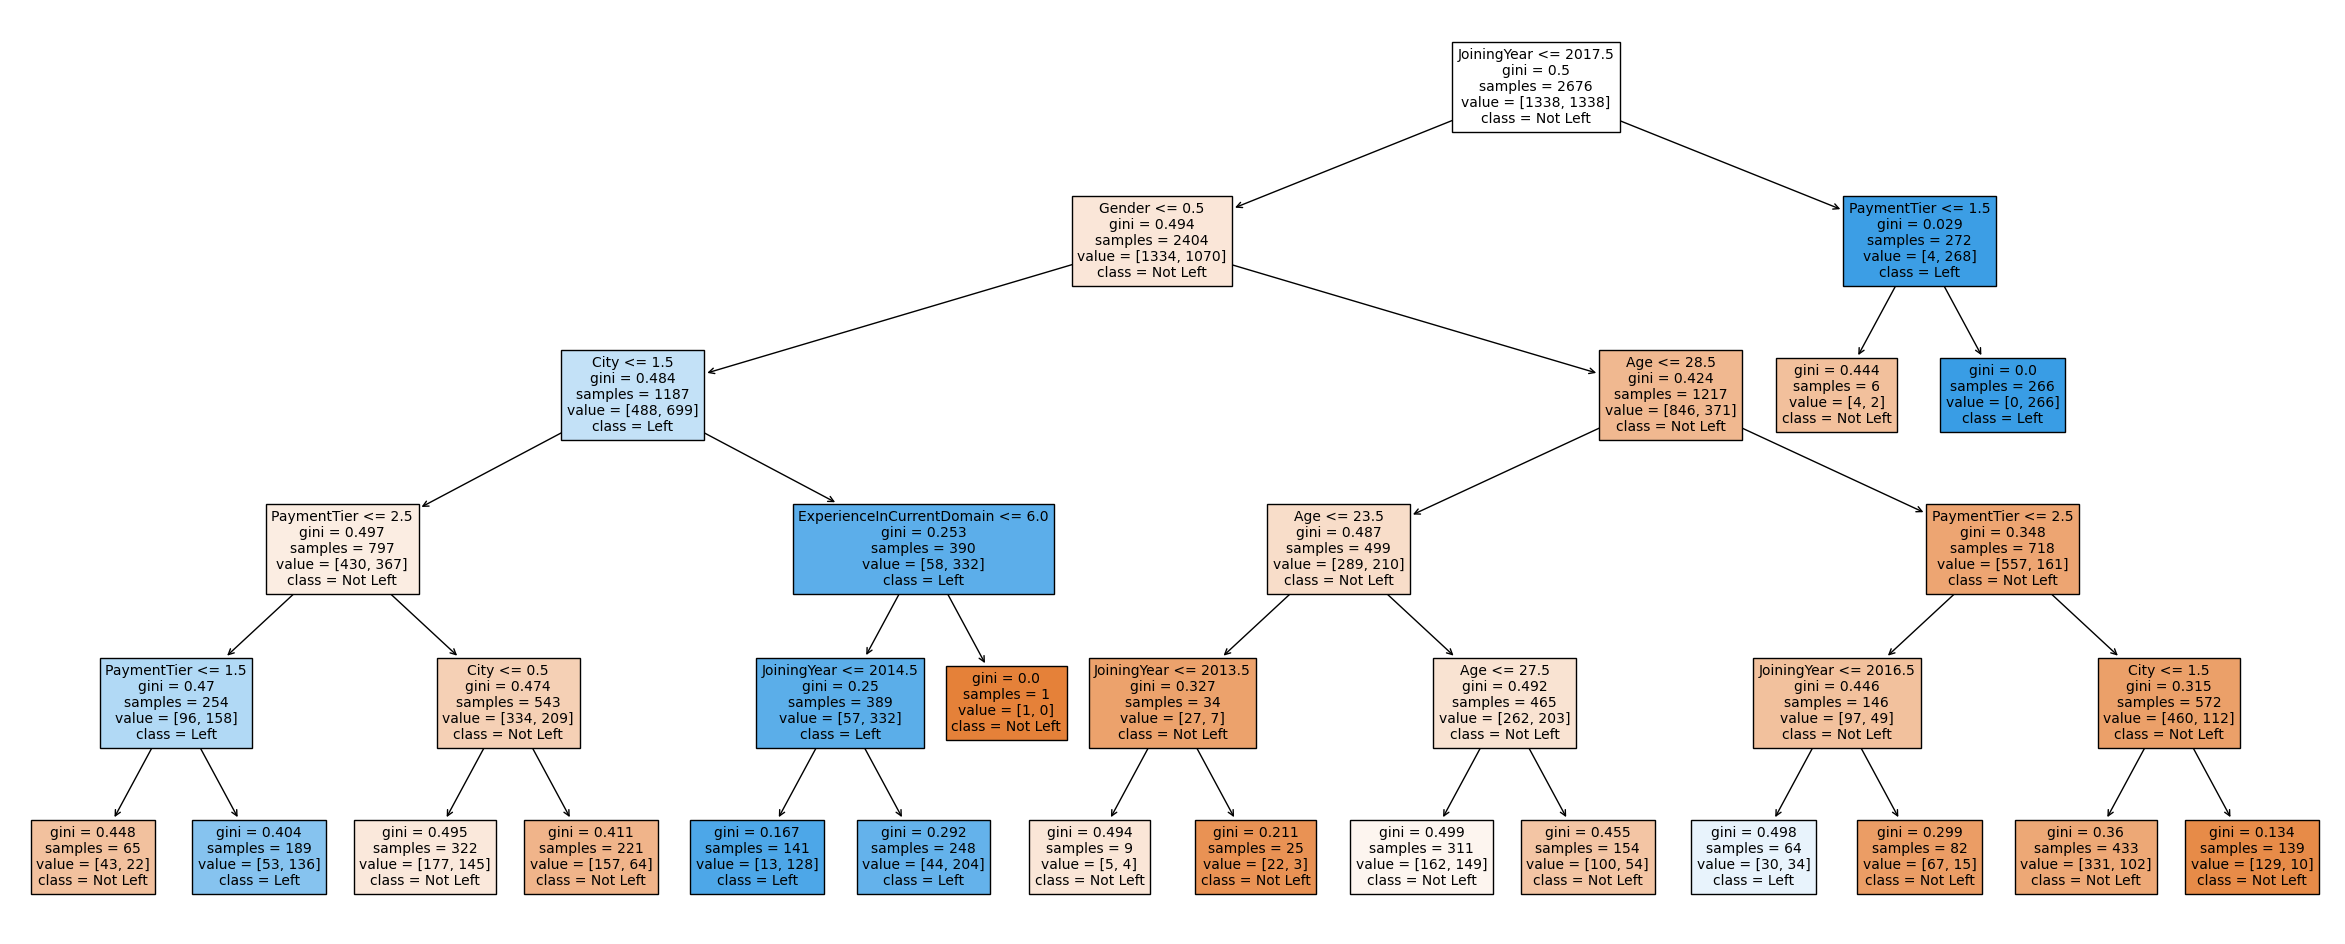

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 결정 트리 모델 초기화
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=12, random_state=124)

# 특성과 타겟 데이터 준비
features, targets = pre_df.iloc[:,:-1] , pre_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

# SMOTE를 사용하여 훈련 데이터 오버샘플링
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 모델 훈련
dtc.fit(X_train_over, y_train_over)

# 결정 트리 시각화
plt.figure(figsize=(30, 12))  # 그림 크기를 조정합니다.
plot_tree(dtc, feature_names=features.columns, class_names=['Not Left', 'Left'], filled=True, fontsize=10)
plt.show()


In [37]:
print(g_dtc.best_params_, g_dtc.best_score_, sep='\n')
# max_depth -> 5 , min_samples_split -> 12 일때 최적의 파라미터 

{'max_depth': 5, 'min_samples_split': 12}
0.730434420078379


In [38]:
g_knn.best_estimator_
# n_neighbors = 15 일때 최적의 파라미터 

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=15))])

In [39]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=12)

In [40]:
from sklearn.metrics import accuracy_score
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_prediction)
print(dtc_score)

0.7432188065099458


In [41]:
knn = g_knn.best_estimator_
knn_prediction = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_prediction)
print(knn_score)

0.7124773960216998


In [42]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_prediction)
print(rfc_score)

0.7739602169981917


In [43]:
svc_l = g_svc.best_estimator_
svc_l_prediction = svc_l.predict(X_test)
svc_l_score = accuracy_score(y_test, svc_l_prediction)
print(svc_l_score)

0.593128390596745


In [44]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)
ada_score = accuracy_score(y_test, ada_prediction)
print(ada_score)

0.7305605786618445


In [45]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)
gbc_score = accuracy_score(y_test, gbc_prediction)
print(gbc_score)

0.7540687160940326


In [46]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_prediction)
print(xgb_score)

0.7721518987341772


In [47]:
lgbm = g_lgbm.best_estimator_
lg_prediction = lgbm.predict(X_test)
lg_score = accuracy_score(y_test, lg_prediction)
print(lg_score)

0.786618444846293


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction , average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

### ✨ 1 Cycle 
#### **SVC-linear kernel 과 Bagging(RandomForest)를 사용하도록 하겠습니다.**

오차 행렬
[[278  60]
 [ 82 133]]
정확도: 0.7432, 정밀도: 0.7307, 재현율: 0.7205, F1: 0.7243, ROC_AUC: 0.7205
################################################################################


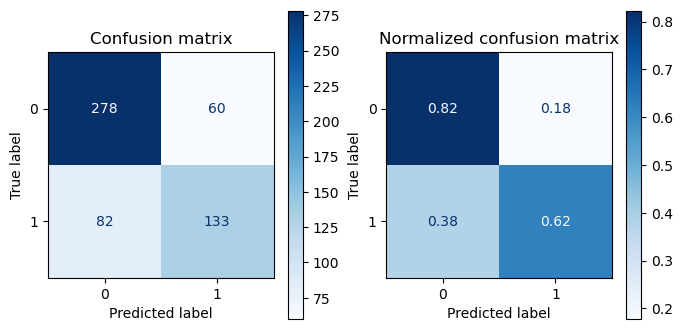

In [49]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)
# dtc -> 74.32%

오차 행렬
[[206 132]
 [ 93 122]]
정확도: 0.5931, 정밀도: 0.5846, 재현율: 0.5885, F1: 0.5835, ROC_AUC: 0.5885
################################################################################


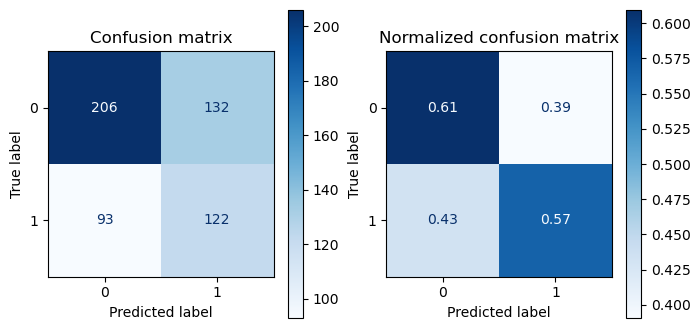

In [50]:
get_evaluation(y_test, svc_l_prediction, svc_l, X_test)
# svc-linear -> 59.31%

### SVC-linear 커널 
#### 정확도 : 0.5931 , F1 Score : 0.5835

오차 행렬
[[246  92]
 [ 67 148]]
정확도: 0.7125, 정밀도: 0.7013, 재현율: 0.7081, F1: 0.7032, ROC_AUC: 0.7081
################################################################################


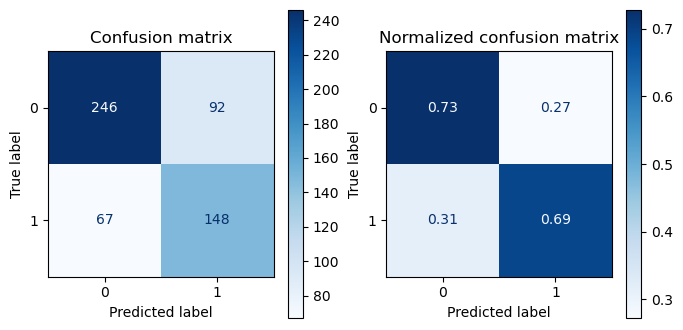

In [51]:
get_evaluation(y_test, knn_prediction, knn, X_test)
# knn -> 71.25%

오차 행렬
[[292  46]
 [ 79 136]]
정확도: 0.7740, 정밀도: 0.7672, 재현율: 0.7482, F1: 0.7544, ROC_AUC: 0.7482
################################################################################


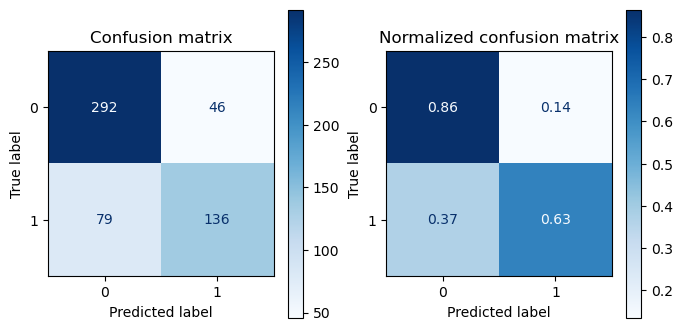

In [52]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)
# Bagging(RandomForest) = 77.4%

오차 행렬
[[264  74]
 [ 75 140]]
정확도: 0.7306, 정밀도: 0.7165, 재현율: 0.7161, F1: 0.7163, ROC_AUC: 0.7161
################################################################################


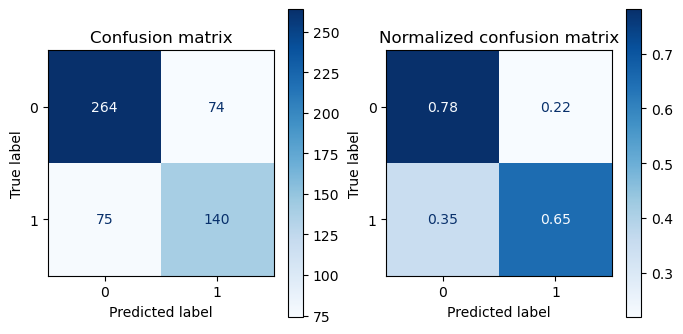

In [53]:
get_evaluation(y_test, ada_prediction, ada, X_test)
# AdaBoost = 73.06%

오차 행렬
[[271  67]
 [ 69 146]]
정확도: 0.7541, 정밀도: 0.7413, 재현율: 0.7404, F1: 0.7408, ROC_AUC: 0.7404
################################################################################


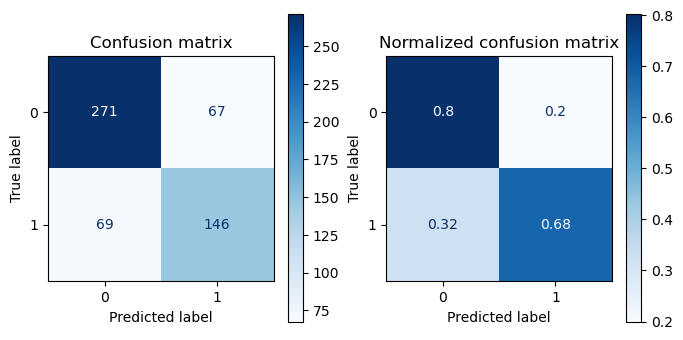

In [54]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)
# GradientBoost = 75.41 %

오차 행렬
[[273  65]
 [ 61 154]]
정확도: 0.7722, 정밀도: 0.7603, 재현율: 0.7620, F1: 0.7611, ROC_AUC: 0.7620
################################################################################


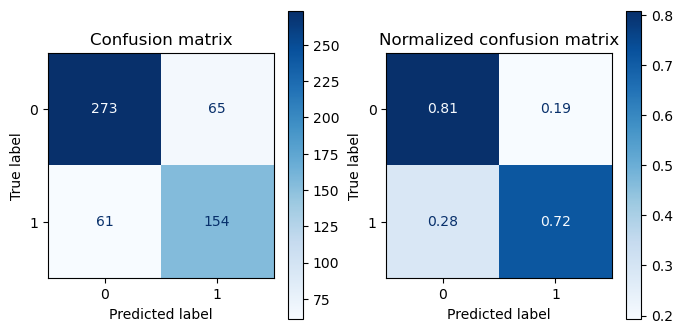

In [55]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)
# XGBoost = 77.22%

오차 행렬
[[272  66]
 [ 52 163]]
정확도: 0.7866, 정밀도: 0.7756, 재현율: 0.7814, F1: 0.7780, ROC_AUC: 0.7814
################################################################################


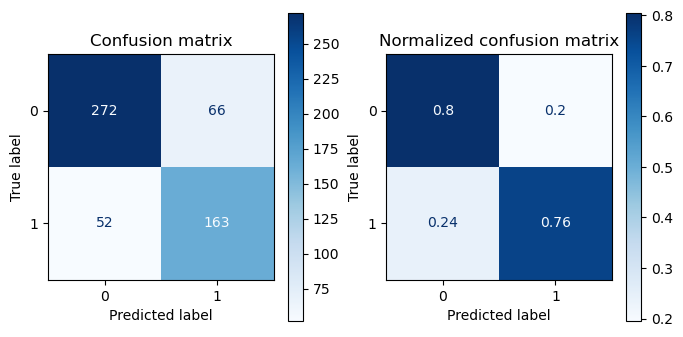

In [56]:
get_evaluation(y_test, lg_prediction, lgbm, X_test)
# Light GBM 78.66%

오차 행렬
[[272  66]
 [ 86 129]]
정확도: 0.7251, 정밀도: 0.7107, 재현율: 0.7024, F1: 0.7054, ROC_AUC: 0.7024
################################################################################


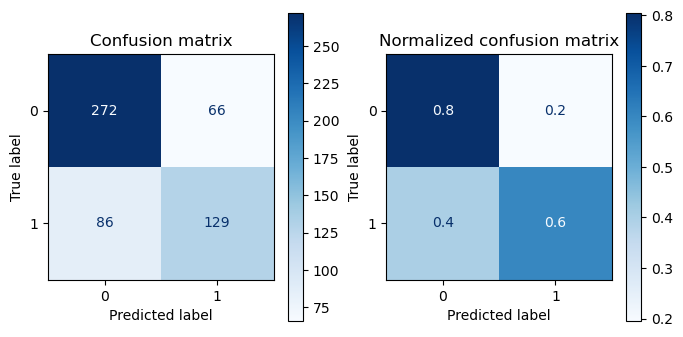

In [86]:
get_evaluation(y_test, svc_r_prediction, svc_r, X_test)
# svc-rbf : 72.51 %

오차 행렬
[[278  60]
 [ 83 132]]
정확도: 0.7414, 정밀도: 0.7288, 재현율: 0.7182, F1: 0.7220, ROC_AUC: 0.7182
################################################################################


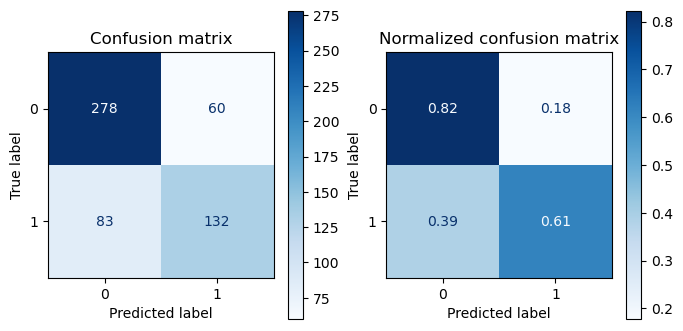

In [108]:
get_evaluation(y_test, vc_h_prediction, vc_hard, X_test)

# voting(hard) = 74.14%

오차 행렬
[[260  78]
 [ 81 134]]
정확도: 0.7125, 정밀도: 0.6973, 재현율: 0.6962, F1: 0.6967, ROC_AUC: 0.6962
################################################################################


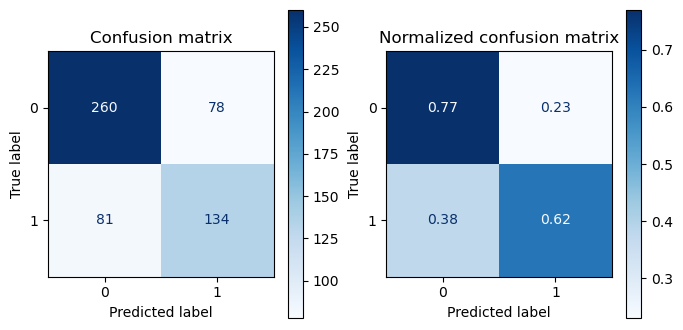

In [113]:
get_evaluation(y_test, vc_s_prediction, vc_soft, X_test)

# voting(soft) = 71.25%

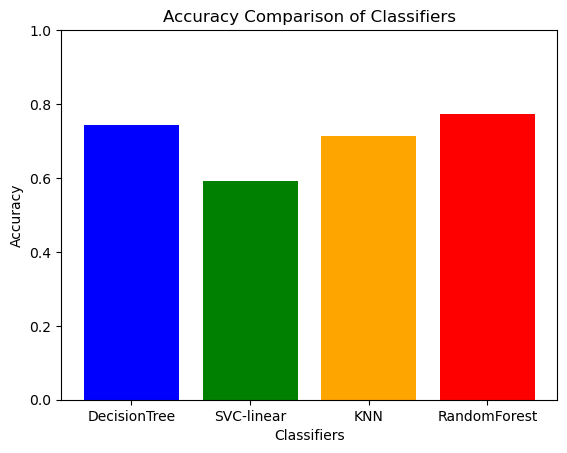

In [57]:
# 색상 리스트 정의
colors = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
accuracies = [dtc_score, # DTC
              svc_l_score, # SVC-linear
              knn_score, # KNN
              rfc_score, # Random Forest
             ]

classifiers = ['DecisionTree','SVC-linear' ,'KNN', 'RandomForest']
plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.ylim(0, 1)  # y축 범위 설정
plt.show() 

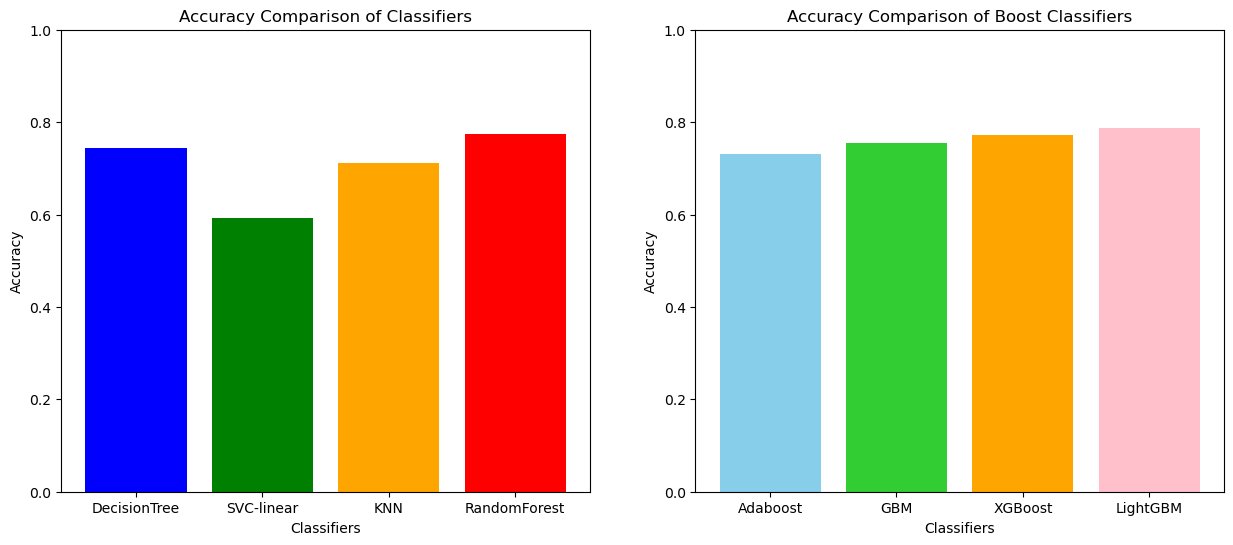

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


# 첫 번째 바 차트 
# 색상 리스트 정의
colors1 = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
accuracies1 = [dtc_score, # DTC
              svc_l_score, # SVC-linear
              knn_score, # KNN
              rfc_score, # Random Forest
             ]

classifiers1 = ['DecisionTree','SVC-linear' ,'KNN', 'RandomForest']
axes[0].bar(classifiers1, accuracies1, color=colors1)
axes[0].set_xlabel('Classifiers')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison of Classifiers')
axes[0].set_ylim(0, 1)  # y축 범위 설정


# 두 번째 바 차트 
# 색상 리스트 정의
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']

# 각 분류기법 Accracy Score 리스트 
accuracies2 = [ada_score, # adaboost
              gbc_score, # gradient boost
              xgb_score, # XGBoost
              lg_score, # LightGBM
             ]

classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
axes[1].bar(classifiers2, accuracies2, color=colors2)
axes[1].set_xlabel('Classifiers')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Comparison of Boost Classifiers')
axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.show() 


### 💡 1 Cycle Result
> 분석 결과 Boost 분류 기법 외 DTC,SVC,KNN,Bagging 중에서 가장 정확도가 높은 분류 기법은 bagging 분류 방식이였으며 77.4 %를 기록하였습니다.
> Boost 분류 기법 에서는 LightGBM의 정확도가 78.66%로 가장 정확도가 높았으며, 전체 분류기법중 가장 정확도가 높았습니다.
> 이러한 분석을 바탕으로 해당 데이터세트에서는 LightGBM 을 사용하는 것이 효과적일 것으로 판단됩니다.
>
> 다음 사이클에서는 SVC에서 rbf 커널을 사용하여 linear 커널로 사용했을 경우와 비교해보도록 하겠습니다.

### ✨ 2 Cycle
#### **SVC kernel (linear vs rbf)**
> 우선 기존 SVC 모델에서 kernel을 rbf 로 변경하고 추가로 gamma 하이퍼파라미터 값을 선언합니다.

In [77]:
# SVC 파라미터 선언 (커널을 rbf로  설정)
svc_parameters = {'svc__C': [0.01, 0.1, 1, 10, 100],
                  'svc__gamma' : [0.01, 0.1, 1, 10, 100],
                  'svc__kernel': ['rbf']
                 }

# SVC 클래스 설정 (커널을 rbf로 설정)
svc = SVC(kernel='rbf', probability=True)

# SVC 파이프라인 구축, 교차 검증 수행
svc_pipe_r = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc_r = GridSearchCV(svc_pipe_r, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_svc_r.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['rbf']},
             return_train_score=True)

In [78]:
print(g_svc_r.best_params_, g_svc_r.best_score_, sep='\n')

{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
0.7361807783512344


In [80]:
g_svc_r.best_estimator_

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=0.1, probability=True))])

In [88]:
svc_r = g_svc_r.best_estimator_
svc_r_prediction = svc_r.predict(X_test)
svc_r_score = accuracy_score(y_test, svc_r_prediction)
print(svc_r_score)

0.7251356238698011


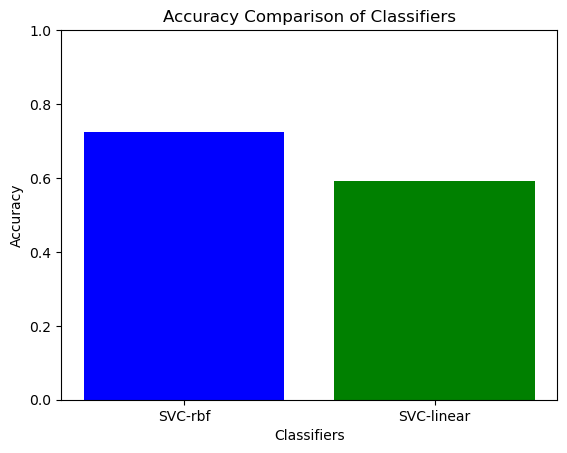

In [90]:
colors = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
accuracies = [svc_r_score, # SVC-rbf
              svc_l_score, # SVC-linear
             ]

classifiers = ['SVC-rbf','SVC-linear' ]
plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.ylim(0, 1)  # y축 범위 설정
plt.show() 

### 💡 2 Cycle Result
> #### SVC-rbf 오차행렬 & 각 통계 점수 (정확도 72.51%)
> 
> <img src='./images/rbf2.png' width="600px">  
>
> 
> #### SVC-linear 오차행렬 & 각 통계 점수 (정확도 59.31%)
> <img src='./images/linear2.png' width="600px">  
>
> #### 📌해당 데이터세트에서는 SVC 분류 시 rbf 커널을 사용하는 것이 더 효과적입니다.

### ✨ 3 Cycle
#### **Voting (hard vs soft)**
> 기존의 RandomForest 모델을 활용한 Bagging 분류기법에서 Votting 분류 기법으로 사용해보고,  Hard , Soft Votting 을 사용해서 각각의 정확도 점수를 비교해보도록 하겠습니다.

In [105]:
from sklearn.ensemble import VotingClassifier
# 정확도: 0.8012, 정밀도: 0.8059, 재현율: 0.8064, F1: 0.8012, ROC_AUC: 0.8064
vc_hard = VotingClassifier(estimators=[('dtc', dtc),('svc',svc_pipe),('knn',knn_pipe), ('ada',g_ada),
                                      ('xgb',xgb)], voting='hard', n_jobs=-1)


# 정확도: 0.8193, 정밀도: 0.8179, 재현율: 0.8190, F1: 0.8183, ROC_AUC: 0.8190
vc_soft = VotingClassifier(estimators=[('dtc', dtc),('svc',svc_pipe),('knn',knn_pipe), ('ada',g_ada),
                                      ('xgb',xgb)], voting='soft', n_jobs=-1)

In [107]:
vc_hard.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=12)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc', SVC(probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier())])),
                             ('ada',
                              GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
                                           n_jobs=-1,
                                           par...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 n_jobs=-1)

In [96]:
vc_h_prediction = vc_hard.predict(X_test)

In [100]:
vc_hard_score = accuracy_score(y_test, vc_h_prediction)
print(vc_hard_score)

# voting (hard) = 0.74%

0.7414104882459313


In [110]:
vc_soft.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=12)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc', SVC(probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier())])),
                             ('ada',
                              GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
                                           n_jobs=-1,
                                           par...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 n_jobs=-1, voting='soft')

In [101]:
vc_s_prediction = vc_soft.predict(X_test)

In [112]:
vc_soft_score = accuracy_score(y_test, vc_s_prediction)
print(vc_soft_score)
# voting (soft) = 0.71%

0.7124773960216998


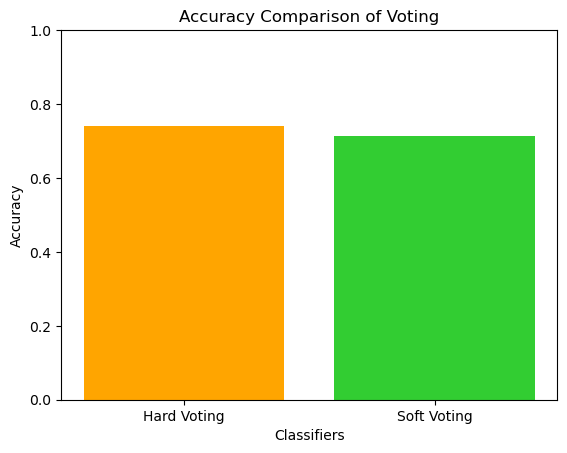

In [114]:
colors = ['orange','limegreen']

# 각 분류기법 Accracy Score 리스트 
accuracies = [vc_hard_score, # Hard Voting
              vc_soft_score, # Soft Voting
             ]

classifiers = ['Hard Voting','Soft Voting' ]
plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Voting')
plt.ylim(0, 1)  # y축 범위 설정
plt.show() 

### 💡 3 Cycle Result
> #### Hard Voting 오차행렬 & 각 통계 점수 (정확도 74.14%)
> 
> <img src='./images/hard2.png' width="600px">  
>
> 
> #### Soft Voting 오차행렬 & 각 통계 점수 (정확도 71.25%)
> <img src='./images/soft2.png' width="600px">  
>
> #### 📌해당 데이터세트에서는 Voting 분류 시 Hard Voting이 적합합니다.

### ✨ 4 Cycle
#### **Voting(hard) vs Bagging(RandomForest)**
> 해당 데이터 세트에서 적합한 Ensemble 분류 모델 중에서 Voting 방식과 Bagging 방식을 서로 비교해보고 더 적합한 분류 기법을 찾겠습니다.

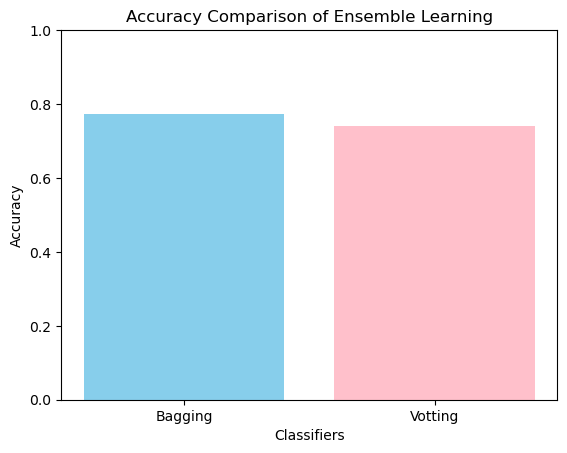

In [115]:
## Bagginhg 방식이 Votting 방식보다 더 정확도가 높은 것을 확인 
# 색상 리스트 정의
colors = ['skyblue', 'pink']

accuracies = [rfc_score,
              vc_hard_score,
             ]

classifiers = ['Bagging', 'Votting']
plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Ensemble Learning')
plt.ylim(0, 1)  # y축 범위 설정
plt.show() 

### 💡 4 Cycle Result

> #### Hard Voting 오차행렬 & 각 통계 점수 (정확도 74.14%)
> 
> <img src='./images/hard2.png' width="600px">  
>
> 
> #### RandomForest Bagging 오차행렬 & 각 통계 점수 (정확도 77.4%)
> <img src='./images/rfc2.png' width="600px">  
>
> #### 📌해당 데이터세트에서는 Voting 방식보다 Bagging 방식으로 분류하는 것이 더 적합합니다.

### 📊 Total Result

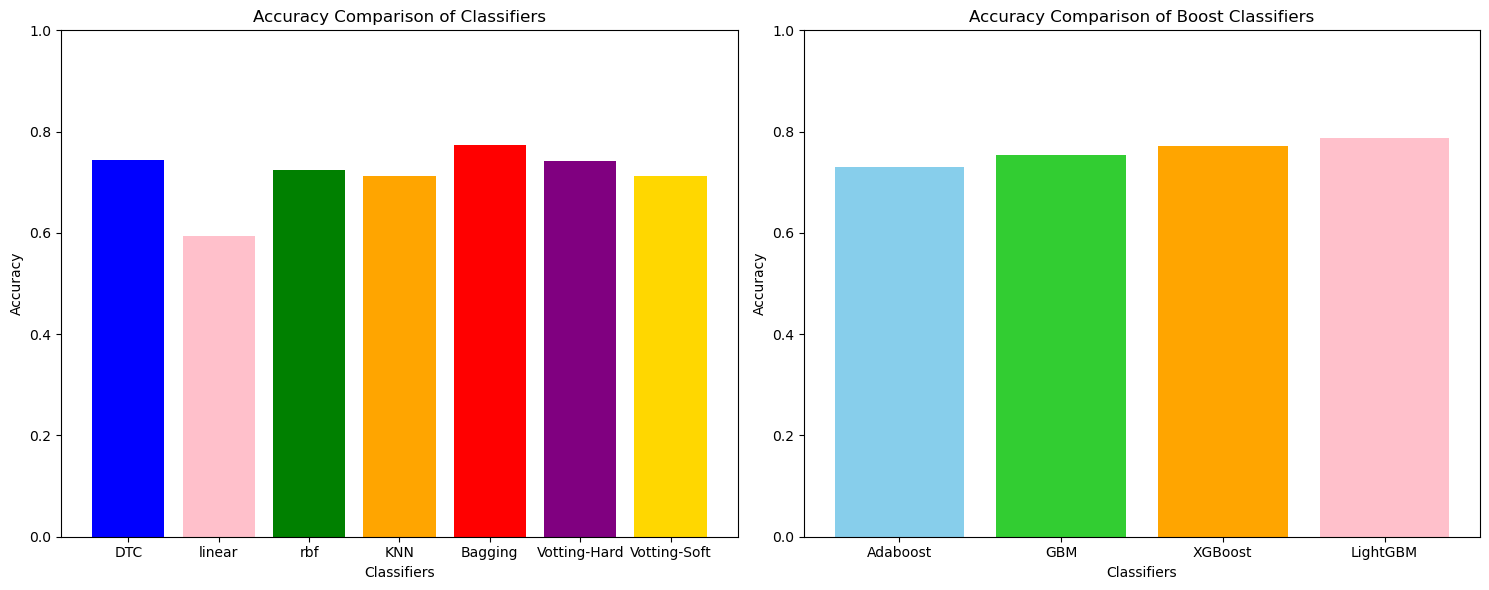

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# 첫 번째 바 차트
colors1 = ['blue', 'pink','green', 'orange', 'red', 'purple', 'gold']
accuracies1 = [dtc_score, svc_l_score, svc_r_score, knn_score, rfc_score, vc_hard_score, vc_soft_score]
classifiers1 = ['DTC', 'linear' ,'rbf', 'KNN', 'Bagging', 'Votting-Hard' , 'Votting-Soft']
axes[0].bar(classifiers1, accuracies1, color=colors1)
axes[0].set_xlabel('Classifiers')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison of Classifiers')
axes[0].set_ylim(0, 1)  # y축 범위 설정

# 두 번째 바 차트
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']
accuracies2 = [ada_score, gbc_score, xgb_score, lg_score]
classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
axes[1].bar(classifiers2, accuracies2, color=colors2)
axes[1].set_xlabel('Classifiers')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Comparison of Boost Classifiers')
axes[1].set_ylim(0, 1)  # y축 범위 설정

plt.tight_layout()
plt.show()

### 📊 Total Result
> 최종 분류 예측 결과 직원들의 퇴사 여부를 예측 하는 데이터에서는 , BOOST 방식을 사용하는 LGBM (LightGradientBoostMachine)의 정확도가 78.66%로 가장 높았으며, 이는 곧 분류 시에 가장 적합한 모델인 것을 의미합니다.
>
> 따라서 해당 데이터 세트에서 권장하는 분류 기법은 LightGBM 입니다.

### 📈 LGBM 분류 기법을 사용한 Confusion Matrix TEST

#### 오차행렬 
> TP : 모델이 퇴사한 직원을 퇴사 예측으로 정확하게 분류한 경우
> 
> FP : 모델이 퇴사 하지 않은 정상 직원을 퇴사 직원으로 잘못 분류한 경우 (error 1)
> 
> TN : 모델이 정상 직원을 정상 직원으로 분류한 경우
> 
> FN : 모델이 퇴사한 직원을 정상 직원으로 잘못 분류한 경우 (error 2)
>
> 📃 임계치를 높혀서 정밀도를 높혀주는 것이 적합하다. (정상적으로 회사를 다니고 있는 직원을 퇴사 예정 직원으로 잘못 분류할 경우의 위험도가 더 크기 때문에)

In [60]:
#이 코드는 LightGBM을 사용하여 테스트 세트에 대한 예측을 수행하고, 각 예측의 확률을 출력.

proba = g_lgbm.predict_proba(X_test)
prediction = g_lgbm.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.001092874067708527, 0.9989071259322915] 1
[0.03994437795137129, 0.9600556220486287] 1
[0.9505030892621189, 0.04949691073788108] 0
[0.5619413042178887, 0.43805869578211126] 0
[0.20077197039586347, 0.7992280296041365] 1
[0.027509799516154065, 0.9724902004838459] 1
[0.3551758574229056, 0.6448241425770944] 1
[0.989865945882376, 0.01013405411762408] 0
[0.699123574279108, 0.300876425720892] 0
[0.915277878322642, 0.08472212167735807] 0
[0.0013198462132726352, 0.9986801537867274] 1
[0.6277524765736932, 0.37224752342630685] 0
[0.03969229950689401, 0.960307700493106] 1
[0.9794708511405098, 0.020529148859490226] 0
[0.7856996442308581, 0.2143003557691418] 0
[0.9640027689663418, 0.03599723103365814] 0
[0.6126130707858943, 0.3873869292141056] 0
[0.441057720698804, 0.558942279301196] 1
[0.00035426263617788223, 0.9996457373638221] 1
[0.5310698581882322, 0.46893014181176784] 0
[0.0116906846267123, 0.9883093153732877] 1
[0.0006129035093435098, 0.9993870964906565] 1
[0.1624108117037233, 0.837589188296

In [61]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = g_lgbm.predict_proba(X_test)
prediction = g_lgbm.predict(X_test)

In [62]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[272  66]
 [ 52 163]]
정확도: 0.7866, 정밀도: 0.7756, 재현율: 0.7814, F1: 0.7780, ROC_AUC: 0.7814
################################################################################


In [63]:
thresholds = [0.24, 0.3, 0.4, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.7]


def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.24
오차 행렬
[[190 148]
 [ 18 197]]
정확도: 0.6998, 정밀도: 0.7422, 재현율: 0.7392, F1: 0.6998, ROC_AUC: 0.7392
################################################################################
0.3
오차 행렬
[[212 126]
 [ 23 192]]
정확도: 0.7306, 정밀도: 0.7530, 재현율: 0.7601, F1: 0.7302, ROC_AUC: 0.7601
################################################################################
0.4
오차 행렬
[[249  89]
 [ 40 175]]
정확도: 0.7667, 정밀도: 0.7622, 재현율: 0.7753, F1: 0.7625, ROC_AUC: 0.7753
################################################################################
0.5
오차 행렬
[[272  66]
 [ 52 163]]
정확도: 0.7866, 정밀도: 0.7756, 재현율: 0.7814, F1: 0.7780, ROC_AUC: 0.7814
################################################################################
0.51
오차 행렬
[[279  59]
 [ 52 163]]
정확도: 0.7993, 정밀도: 0.7886, 재현율: 0.7918, F1: 0.7900, ROC_AUC: 0.7918
################################################################################
0.52
오차 행렬
[[285  53]
 [ 54 161]]
정확도: 0.8065, 정밀도: 0.7965, 재현율: 0.7960, F1: 0.7963, ROC_AUC:

In [64]:
from sklearn.preprocessing import Binarizer

threshold = 0.6 # 임계값을 0.6으로 높혀서 정밀도 높힘  


proba = g_lgbm.predict_proba(X_test)
prediction = g_lgbm.predict(X_test)

In [65]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[296  42]
 [ 65 150]]
정확도: 0.8065, 정밀도: 0.8006, 재현율: 0.7867, F1: 0.7920, ROC_AUC: 0.7867
################################################################################


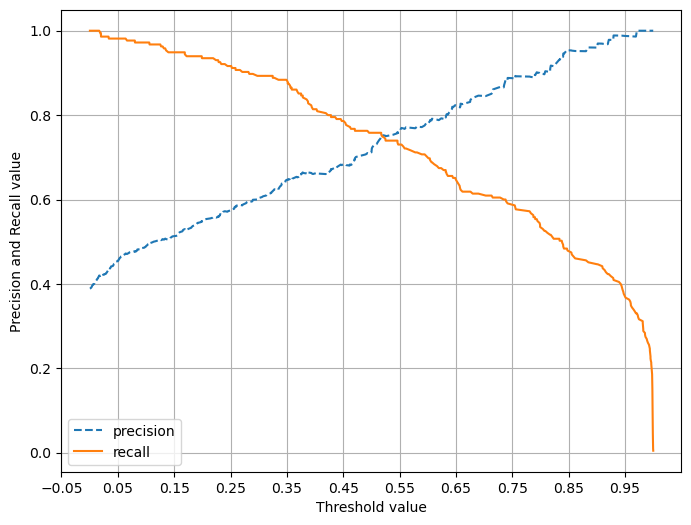

In [66]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, custom_proba)

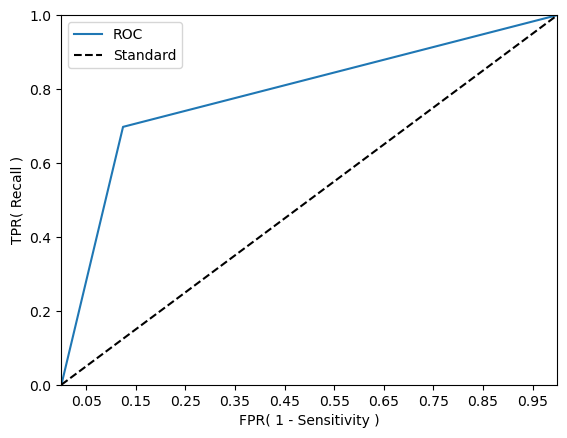

In [67]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, custom_prediction)


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_evaluation(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


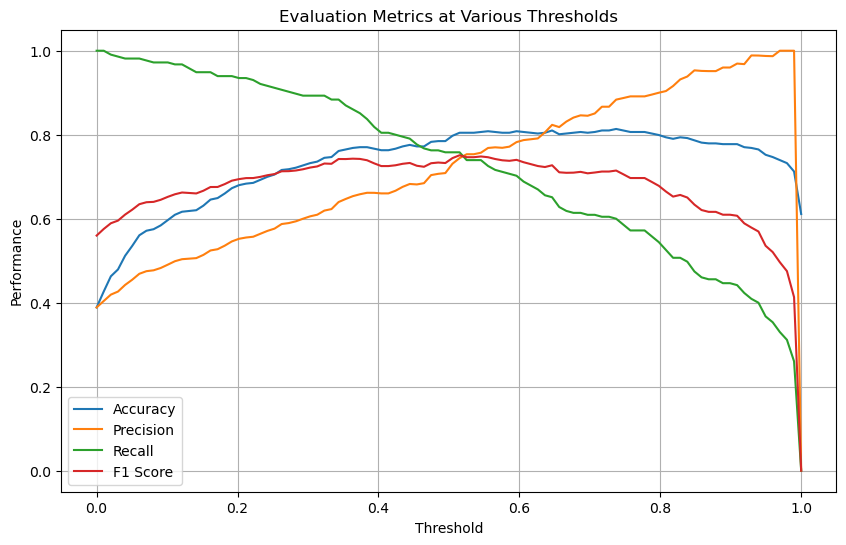

In [69]:
thresholds = np.linspace(0, 1, 100)
evaluations = []

for thresh in thresholds:
    binarizer = Binarizer(threshold=thresh)
    custom_prediction = binarizer.fit_transform(proba[:, 1].reshape(-1, 1))
    evaluations.append(get_evaluation(y_test, custom_prediction))

evaluations = np.array(evaluations)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, evaluations[:, 0], label='Accuracy')
plt.plot(thresholds, evaluations[:, 1], label='Precision')
plt.plot(thresholds, evaluations[:, 2], label='Recall')
plt.plot(thresholds, evaluations[:, 3], label='F1 Score')
plt.title('Evaluation Metrics at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Performance')
plt.legend(loc='best')
plt.grid(True)
plt.show()